In [1]:
from sklearn import datasets as ds
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1 - Load dataset
iris = ds.load_breast_cancer()

TOTAL_SIZE = len(iris.data)
TRAIN_SIZE = int(TOTAL_SIZE * 0.8)
VAL_SIZE = int(TOTAL_SIZE * 0.1)
TEST_SIZE = int(TOTAL_SIZE * 0.1)

#print(TOTAL_SIZE)
#print(TRAIN_SIZE)
#print(VAL_SIZE)
#print(TEST_SIZE)

# Step 2 - Split dataset into training, validation, and test splits
X_todo, X_test, y_todo, y_test = train_test_split(iris.data, iris.target, test_size=TEST_SIZE, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_todo, y_todo, test_size=VAL_SIZE, random_state=0)

In [2]:
# To make sure that everything is correct and also to get an overview of the
# dimensions of the data, we print out the shapes of each variable.
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_val:", y_test.shape)


X_train: (457, 30) y_train: (457,)
X_val: (56, 30) y_val: (56,)
X_test: (56, 30) y_val: (56,)


Now, let us look at other details of the dataset, such as the data type and minimum and maximum values.

In [3]:
X_train.dtype

dtype('float64')

In [4]:
X_train.min()

0.0

In [5]:
X_train.max()

4254.0

In [6]:
y_train.dtype

dtype('int64')

In [7]:
y_train.min()

0

In [8]:
y_train.max()

1

In [9]:
X_train[0]

array([1.429e+01, 1.682e+01, 9.030e+01, 6.326e+02, 6.429e-02, 2.675e-02,
       7.250e-03, 6.250e-03, 1.508e-01, 5.376e-02, 1.302e-01, 7.198e-01,
       8.439e-01, 1.077e+01, 3.492e-03, 3.710e-03, 4.826e-03, 3.608e-03,
       1.536e-02, 1.381e-03, 1.491e+01, 2.065e+01, 9.444e+01, 6.846e+02,
       8.567e-02, 5.036e-02, 3.866e-02, 3.333e-02, 2.458e-01, 6.120e-02])

In [10]:
y_train[0]

1

In [11]:
# Step 3 - Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
# Notice that after the transformation the type of the inputs will change from integer to float.
X_train.dtype

dtype('float64')

In [13]:
X_train.min()

-3.072910804514224

In [14]:
X_train.max()

11.389593336632979

In [15]:
import tensorflow.keras as keras

# We set the random seed to 0
keras.utils.set_random_seed(0)

n_classes = 2

# We apply one-hot encoding using the to_categorical Keras function.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [16]:
# We can see that after the transformation, each row has been transformed.
# Notice how the first element, which was previously 5, is now all zeroes
# except for the 6th column. The same logic is true for the other rows as
# well.
y_train[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [17]:
y_val[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Building the network

Now, we can finally start building our neural network. For this, we will use the Sequential class of the keras library, which makes building neural networks really easy.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# The neural network will have 2 hidden layers in total, each with 512-512
# neurons.
model = Sequential([
    Dense(units=16, activation="relu", input_shape=(30,)),
    #Dropout(0.5),
    Dense(units = 16, activation="relu"),
    Dense(units = n_classes, activation="softmax")
])

# Lastly, we also need to compile the model, which is the same as saying
# that we specify the loss and metric used during training.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# We can now print the summary of the model, which tells us how many
# layers there are in the model and how many neurons each one has.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 802 (3.13 KB)
Trainable params: 802 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# We can now train the model using the .fit() function.
history = model.fit(
    X_train, y_train, epochs=10, verbose=1, validation_data=(X_val, y_val), batch_size=32
)

Epoch 1/10
15/15 [==============================] - 0s 5ms/step - loss: 0.9401 - accuracy: 0.2582 - val_loss: 0.9306 - val_accuracy: 0.2500
Epoch 2/10
15/15 [==============================] - 0s 1ms/step - loss: 0.8374 - accuracy: 0.3348 - val_loss: 0.8270 - val_accuracy: 0.3571
Epoch 3/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.4333 - val_loss: 0.7286 - val_accuracy: 0.5357
Epoch 4/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5514 - val_loss: 0.6434 - val_accuracy: 0.6964
Epoch 5/10
15/15 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6674 - val_loss: 0.5714 - val_accuracy: 0.7679
Epoch 6/10
15/15 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7724 - val_loss: 0.5137 - val_accuracy: 0.8571
Epoch 7/10
15/15 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.8206 - val_loss: 0.4652 - val_accuracy: 0.8750
Epoch 8/10
15/15 [==

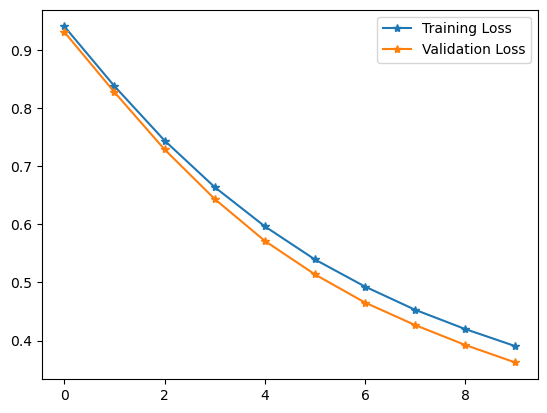

In [27]:
# After the training is done, it is time to check the training and validation
# losses. Both seem to have decreased over the epochs, which is a good sign.
plt.plot(history.history["loss"], "*-")
plt.plot(history.history["val_loss"], "*-")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

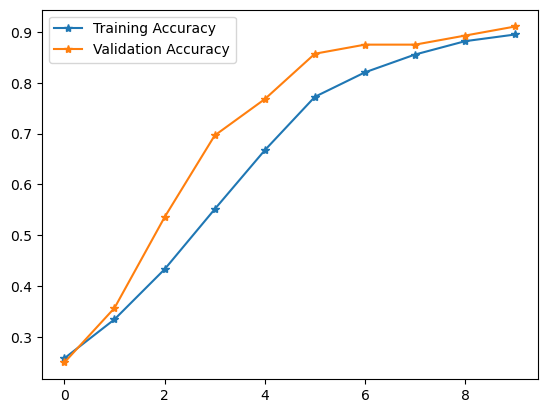

In [28]:
# If we check the accuracies, we will see a similar trend:
# both the training and validation accuracies have increased
# during training.
plt.plot(history.history["accuracy"], "*-")
plt.plot(history.history["val_accuracy"], "*-")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()